In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

import tensorflow_datasets as tfds

from architecture import Encoder, Decoder, MFVAE, VampVAE

import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

In [2]:
dataset = tfds.load(name="mnist", split=tfds.Split.TRAIN)
dataset = dataset.map(lambda x: tf.cast(x["image"], tf.float32) / 255.0)
dataset = dataset.shuffle(5000)
dataset = dataset.repeat()
dataset = dataset.batch(64)

In [3]:
mf_vae = MFVAE(latents=32)
vamp_vae = VampVAE(latents=32)

In [ ]:
steps = 3400
beta = 0.01
learn_rate = 1e-4

log_freq = 100

optimizer = tf.optimizers.Adam(learn_rate)

model = vamp_vae

for i, batch in enumerate(tqdm(dataset.take(steps), total=steps)):
    
    with tf.GradientTape() as tape:
        
        reconstruction = model(batch)
        
        nll = -tf.reduce_mean(model.likelihood.log_prob(reconstruction))
        # kl = tf.reduce_mean(tfd.kl_divergence(model.posterior, model.prior))
        
        z = model.posterior.sample()
        kl = model.posterior.log_prob(z) - model.prior.log_prob(z)
        kl = tf.reduce_mean(kl)
        
        loss = nll + beta * kl
        
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    if i % log_freq == 0:
        print(f"Iteration {i + 1}, Loss: {loss:.4f}, KL: {kl:.4f}, Log-Lik: {-nll:.4f}")

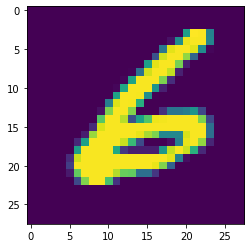

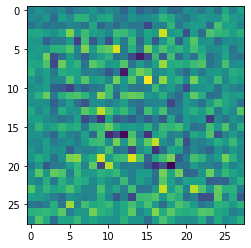

In [4]:
for batch in dataset.take(1):
    plt.imshow(batch[0, ..., 0])
    plt.show()
    plt.imshow(vamp_vae(batch)[0, ..., 0])
    plt.show()

Iteration 601, Loss: 0.9334, KL: 0.5766, Log-Lik: -0.9276
Iteration 701, Loss: 0.9347, KL: 0.5941, Log-Lik: -0.9287
Iteration 801, Loss: 0.9342, KL: 0.5778, Log-Lik: -0.9284
Iteration 901, Loss: 0.9350, KL: 0.5890, Log-Lik: -0.9291
Iteration 1001, Loss: 0.9340, KL: 0.5601, Log-Lik: -0.9284
Iteration 1101, Loss: 0.9347, KL: 0.5933, Log-Lik: -0.9288
Iteration 1201, Loss: 0.9344, KL: 0.5956, Log-Lik: -0.9284
Iteration 1301, Loss: 0.9341, KL: 0.5848, Log-Lik: -0.9282
Iteration 1401, Loss: 0.9355, KL: 0.6010, Log-Lik: -0.9295
Iteration 1501, Loss: 0.9349, KL: 0.6123, Log-Lik: -0.9288
Iteration 1601, Loss: 0.9334, KL: 0.5577, Log-Lik: -0.9278
Iteration 1701, Loss: 0.9341, KL: 0.5814, Log-Lik: -0.9283
Iteration 1801, Loss: 0.9340, KL: 0.5970, Log-Lik: -0.9280
Iteration 1901, Loss: 0.9343, KL: 0.6053, Log-Lik: -0.9282
Iteration 2001, Loss: 0.9331, KL: 0.5741, Log-Lik: -0.9274
Iteration 2101, Loss: 0.9340, KL: 0.5855, Log-Lik: -0.9281
Iteration 2201, Loss: 0.9335, KL: 0.5739, Log-Lik: -0.9278
Iteration 2301, Loss: 0.9340, KL: 0.5668, Log-Lik: -0.9283
Iteration 2401, Loss: 0.9335, KL: 0.5738, Log-Lik: -0.9277
Iteration 2501, Loss: 0.9343, KL: 0.6136, Log-Lik: -0.9281